In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 불러오기

In [5]:
df = pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 다중회귀

## 변수 선택
* 3가지 독립변수 모두 선택

In [6]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [7]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(150, 3) (50, 3) (150,) (50,)


## 스케일링
- 선형회귀 모델은 변수의 스케일에 영향을 받음.
- 트리 모델은 스케일링의 영향을 거의 받지 않음.

In [8]:
# ------------------------------------------
# 독립변수 스케일링
# ------------------------------------------

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaler.fit(X_train)
# train_scaled = scaler.transform(X_train)
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [9]:
# X_train.columns

In [10]:
# ------------------------------------------
# 독립변수 데이터프레임 형태로 변환
# ------------------------------------------

X_train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(test_scaled, columns=X_test.columns)

In [11]:
# ------------------------------------------
# 스케일링 결과 확인
# ------------------------------------------

X_train_scaled.describe()

,TV,Radio,Newspaper
count,1.500000e+02,1.500000e+02,1.500000e+02
mean,-3.019807e-16,-2.368476e-17,4.263256e-16
std,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.795189e+00,-1.581617e+00,-1.459576e+00
25%,-7.853376e-01,-8.933672e-01,-8.618652e-01
50%,1.301900e-01,-1.007862e-01,-2.205965e-01
75%,7.942866e-01,9.374780e-01,7.304172e-01
max,1.691244e+00,1.756983e+00,3.409227e+00


In [12]:
X_train_scaled

,TV,Radio,Newspaper
0,-0.881430,1.568514,0.195623
1,0.182068,-1.103712,-0.854606
2,-1.700865,1.709866,2.155728
3,-1.711477,1.036761,0.974825
4,-0.902652,-1.527768,-0.757810
...,...,...,...
145,-1.508681,-0.841202,-0.036685
146,0.602987,0.632898,0.752196
147,0.763337,0.673284,1.381366
148,0.149055,-0.908512,-0.622297


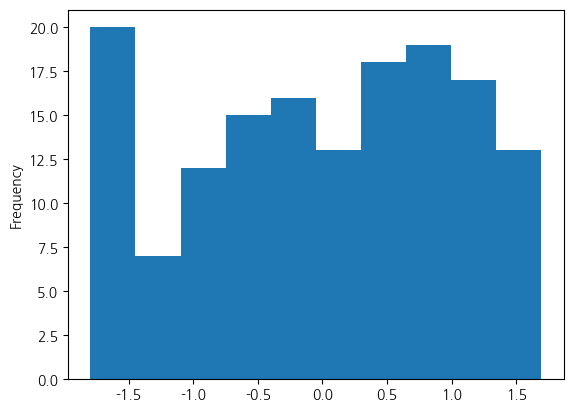

In [13]:
X_train_scaled['TV'].plot(kind='hist')
pass

## 모델 생성 및 훈련

In [14]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------

from sklearn.linear_model import LinearRegression

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------

model = LinearRegression()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------

model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 평가

In [15]:
# ------------------------------------------
# 평가 방법 선택 : MSE, MAE, RMSE, R2
# ------------------------------------------

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

# ------------------------------------------
# 테스트 데이터의 예측값
#   pred
# ------------------------------------------

y_pred = model.predict(X_test_scaled)

# ------------------------------------------
# 모델 평가 
#   - 예측값과 실제값의 차이(Loss/Error) 이용
# ------------------------------------------

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)

print(f'mse : {mse:.4f}')
print(f'mae : {mae:.4f}')
print(f'rmse : {rmse:.4f}')
print(f'r2 score : {r2score:.4f}')

mse : 2.4041
mae : 1.1200
rmse : 1.5505
r2 score : 0.9116


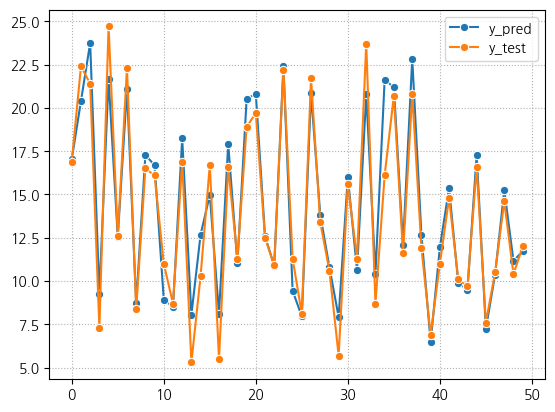

In [16]:
# ------------------------------------
# 실제값과 예측값 시각화 비교
# ------------------------------------
sns.lineplot(y_pred, marker='o', label='y_pred')
sns.lineplot(np.array(y_test), marker='o', label='y_test')
plt.grid(ls=':')
plt.legend()
pass

## 모델의 학습 결과

In [17]:
# ------------------------------------
# 회귀계수와 절편
# ------------------------------------
print(f'회귀계수:{model.coef_}')
print(f'절편:{model.intercept_}')

w1 = model.coef_[0]
w2 = model.coef_[1]
w3 = model.coef_[2]

b = model.intercept_

# ------------------------------------
# 모델이 도출한 규칙
# ------------------------------------
print('=== 모델이 학습한 규칙 ===')
print(f'{w1} * tv + {w2} * radio + {w3} * newspaper + {b}')

회귀계수:[4.63204383 1.48207916 0.0889496 ]
절편:15.570666666666671
=== 모델이 학습한 규칙 ===
4.632043828977965 * tv + 1.482079157483419 * radio + 0.08894959848537343 * newspaper + 15.570666666666671


<Axes: >

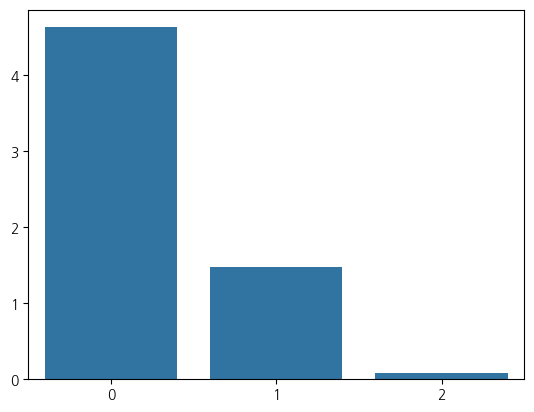

In [18]:
# ------------------------------------
# 회귀계수 시각화
# ------------------------------------

sns.barplot(model.coef_)

## 새로운 값 예측하기
* 스케일링 된 데이터로 훈련했으므로 예측할 데이터도 스케일링을 해주어야 한다.
* 훈련세트에서 사용한 스케일려를 이용하여 스케일링한다.
* 이 때는 fit 하지 않고 transform만 한다.

In [30]:
# ---------------------------
# 새로운 값 입력받기
# ---------------------------

tv = float(input('TV >>> '))
radio = float(input('Radio >>> '))
newspaper = float(input('Newspaper >>> '))

In [31]:
# ---------------------------
# 새로운 값 스케일링
# ---------------------------

new_data = [[tv, radio, newspaper]]
new_data = pd.DataFrame(new_data, columns=X_train.columns)
new_data = scaler.transform(new_data)
new_data = pd.DataFrame(new_data, columns=X_train.columns)
new_data

,TV,Radio,Newspaper
0,-1.75628,-1.245064,-1.18371


In [32]:
# ---------------------------
# 새로운 값으로 예측
# ---------------------------

model.predict(new_data)

array([5.4849246])